# Data Science 
## Titanic Worked Example 
Author: Andrew Szwec

<img src="./images/titanic.jpg" alt="Titanic" width=400 height=600>

<img src="./images/titanic_voyage.jpg" alt="Voyage" width=800>

## Hypothesis

**In the Titanic passenger dataset downloaded from https://github.com/generalassembly-studio/dat10syd/tree/master/data, containing data from 2/4/1912 to 14/4/1912, passengers in 1st class (Pclass==1) have a higher likelihood of survival than passengers in 3rd class (Pclass==3).**

<img src="./images/smart.png" alt="Smart" width=600>

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from string import ascii_letters
import seaborn as sns

%matplotlib inline

In [35]:
df = pd.read_csv('titanic.csv')
df.head()
df.shape

(891, 12)

In [36]:
df[['Survived', 'Pclass', 'Sex', 'Age', 'SibSp','Parch', 'Fare', 'Embarked']].head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


## Count of Survived by passenger class

In [37]:
df.groupby(['Pclass', 'Survived']).count()

PassengerId  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass Survived                                                            
1      0                  80    80   80   64     80     80      80    80   
       1                 136   136  136  122    136    136     136   136   
2      0                  97    97   97   90     97     97      97    97   
       1                  87    87   87   83     87     87      87    87   
3      0                 372   372  372  270    372    372     372   372   
       1                 119   119  119   85    119    119     119   119   

                 Cabin  Embarked  
Pclass Survived                   
1      0            59        80  
       1           117       134  
2      0             3        97  
       1            13        87  
3      0             6       372  
       1             6       119

In [38]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [39]:
# Using Function
def survived_name(x):
    if x == 0:
        return 'Perished'
    else:
        return 'Survived'
    
survived_name('string')    

'Survived'

In [40]:
# Using Dictionary
class_dict = {1: '1st', 2: '2nd', 3: '3rd'}
    
df['SurvivedDesc'] = df['Survived'].apply(survived_name)
df['PclassDesc'] = df['Pclass'].apply(class_dict.get)

df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,SurvivedDesc,PclassDesc
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Perished,3rd
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Survived,1st
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Survived,3rd
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Survived,1st
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Perished,3rd


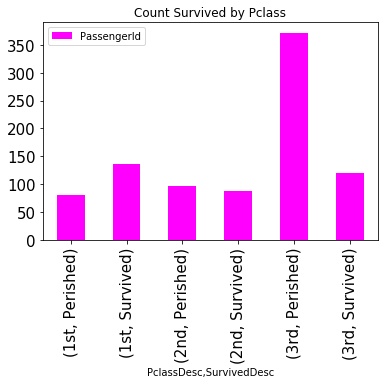

In [41]:
df.groupby(['PclassDesc', 'SurvivedDesc']).count()['PassengerId'] \
    .plot(kind='bar', stacked=True, title='Count Survived by Pclass' \
          , legend=True, fontsize=15, colormap='spring')

This does not prove that you were more likely to survive in 3rd class. It just shows there were more people in 3rd class that did survive, but what were the volume of 3rd class passengers compared to 1st class?

                         PassengerId
PclassDesc SurvivedDesc             
1st        Perished               80
           Survived              136
2nd        Perished               97
           Survived               87
3rd        Perished              372
           Survived              119
                         PassengerId
PclassDesc SurvivedDesc             
1st        Perished        37.037037
           Survived        62.962963
2nd        Perished        52.717391
           Survived        47.282609
3rd        Perished        75.763747
           Survived        24.236253


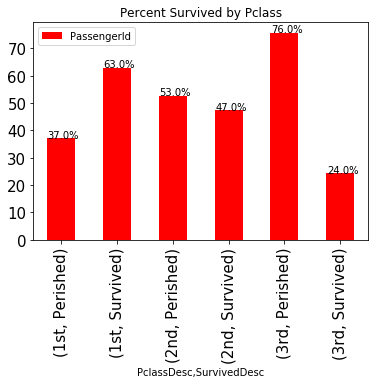

In [42]:
# Percent by Volume
grp_class_surv = df.groupby(['PclassDesc', 'SurvivedDesc']).agg({'PassengerId': 'count'})
print(grp_class_surv)

# Calculate Percentage
grp_perc = grp_class_surv.groupby(level=0).apply(lambda x:  x / float(x.sum()) * 100)
# Print table
print(grp_perc)

ax = grp_perc.plot(kind='bar', stacked=True, title='Percent Survived by Pclass', legend=True, fontsize=15, colormap='autumn')

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),0))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))

In [43]:
grp_perc.index

MultiIndex(levels=[['1st', '2nd', '3rd'], ['Perished', 'Survived']],
           labels=[[0, 0, 1, 1, 2, 2], [0, 1, 0, 1, 0, 1]],
           names=['PclassDesc', 'SurvivedDesc'])

# Lets look at Survived only

In [44]:
# Percent by Volume
df2 = df[df['Survived']==1]
df2.shape

(342, 14)

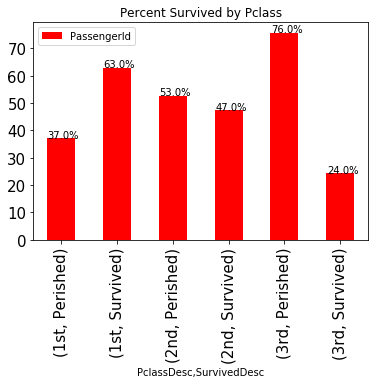

In [45]:
grp_class_surv = df.groupby(['PclassDesc', 'SurvivedDesc']).agg({'PassengerId': 'count'})
# Calculate Percentage
grp_perc = grp_class_surv.groupby(level=0).apply(lambda x: 100 * x / float(x.sum()))


ax = grp_perc.plot(kind='bar', stacked=True, title='Percent Survived by Pclass', legend=True, fontsize=15, colormap='autumn')

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),0))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))

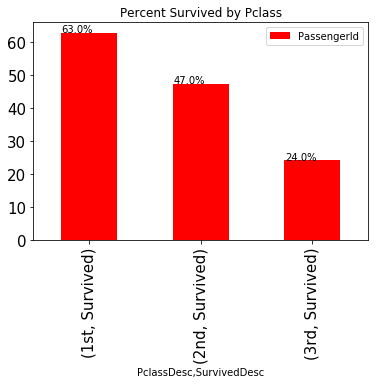

In [46]:
a = grp_perc.reset_index()[grp_perc.reset_index().SurvivedDesc == 'Survived'].set_index(['PclassDesc', 'SurvivedDesc'])

ax = a.plot(kind='bar', stacked=True, title='Percent Survived by Pclass', legend=True, fontsize=15, colormap='autumn')

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),0))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))

## Conclusion
After analysising the Titanic dataset the hypothesis has been proven true. The above figure shows that the likelihood of survival for a 1st class passenger is 63%, while the likelihood of a 3rd class passenger is 24%.


  


## Lets Explore this dataset further

In [69]:
df.head()
grp = df[df["Survived"]==1].groupby("Sex").count()["Survived"].reset_index()
grp

,Sex,Survived
0,female,233
1,male,109


                     PassengerId
Sex    SurvivedDesc             
female Perished               81
       Survived              233
male   Perished              468
       Survived              109
                     PassengerId
Sex    SurvivedDesc             
female Perished        25.796178
       Survived        74.203822
male   Perished        81.109185
       Survived        18.890815


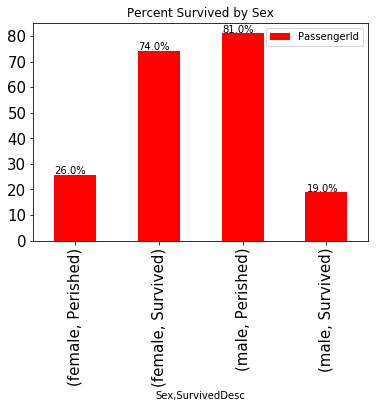

In [54]:
# Percent by Volume
grp_class_surv = df.groupby(['Sex', 'SurvivedDesc']).agg({'PassengerId': 'count'})
print(grp_class_surv)

# Calculate Percentage
grp_perc = grp_class_surv.groupby(level=0).apply(lambda x:  x / float(x.sum()) * 100)
# Print table
print(grp_perc)

ax = grp_perc.plot(kind='bar', stacked=True, title='Percent Survived by Sex', legend=True, fontsize=15, colormap='autumn')

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),0))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))
    
    

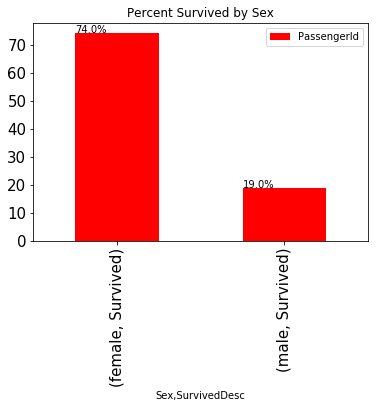

In [55]:
a = grp_perc.reset_index()[grp_perc.reset_index().SurvivedDesc == 'Survived'].set_index(['Sex', 'SurvivedDesc'])

ax = a.plot(kind='bar', stacked=True, title='Percent Survived by Sex', legend=True, fontsize=15, colormap='autumn')

for p in ax.patches:
    ax.annotate(str(np.round(p.get_height(),0))+'%', (p.get_x() * 1.005, p.get_height() * 1.005))

## Pandas Plotting Cookbook
### Charts
https://pandas.pydata.org/pandas-docs/stable/visualization.html
### Plotting Options
https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html
## Colour Maps
https://matplotlib.org/users/colormaps.html

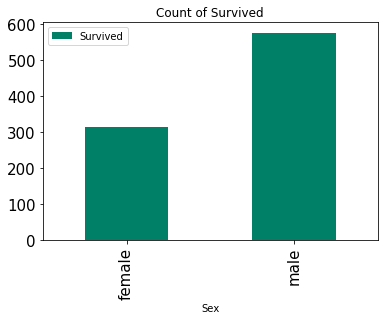

In [61]:
grp.set_index('Sex').plot.bar(title='Count of Survived', legend=True, fontsize=15, colormap='summer')

In [62]:
grp = df.groupby(['Sex', 'Pclass']).count()['Survived'].reset_index()
grp

,Sex,Pclass,Survived
0,female,1,94
1,female,2,76
2,female,3,144
3,male,1,122
4,male,2,108
5,male,3,347


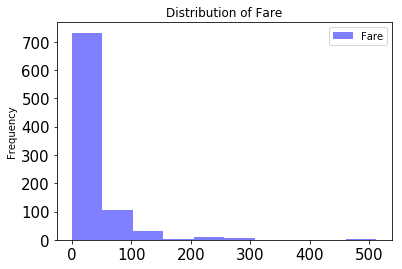

In [63]:
df['Fare'].plot.hist(alpha=0.5, title='Distribution of Fare', legend=True, fontsize=15, colormap='winter')

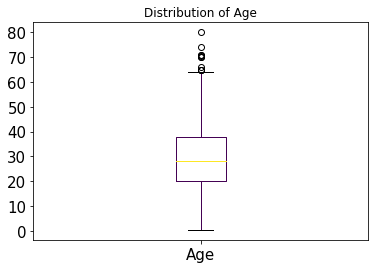

In [70]:
df['Age'].plot.box( title='Distribution of Age', legend=True, fontsize=15, colormap='viridis')



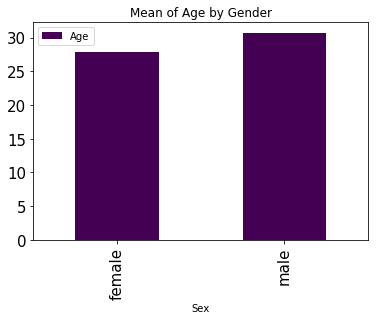

In [71]:
df.groupby('Sex').mean()['Age'].plot(kind='bar', title='Mean of Age by Gender', legend=True, fontsize=15, colormap='viridis')


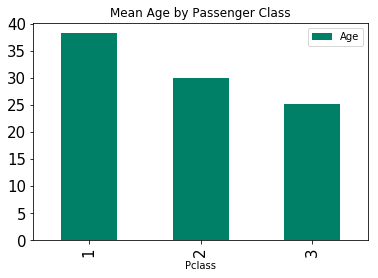

In [72]:
df.groupby('Pclass').mean()['Age'].plot(kind='bar', title='Mean Age by Passenger Class', legend=True, fontsize=15, colormap='summer')


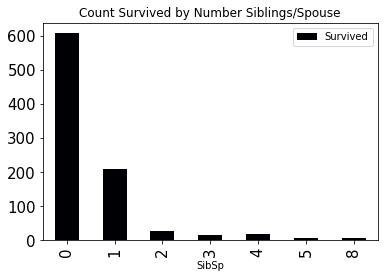

In [75]:
df.groupby('SibSp').count()['Survived'].plot(kind='bar', title='Count Survived by Number Siblings/Spouse', legend=True, fontsize=15, colormap='inferno')

## Subset to the useful columns

In [77]:
dd = df[['Survived', 'SibSp', 'Pclass', 'Sex', 'Age', 'Parch', 'Fare', 'Embarked']]
dd.head()

,Survived,SibSp,Pclass,Sex,Age,Parch,Fare,Embarked
0,0,1,3,male,22.0,0,7.2500,S
1,1,1,1,female,38.0,0,71.2833,C
2,1,0,3,female,26.0,0,7.9250,S
3,1,1,1,female,35.0,0,53.1000,S
4,0,0,3,male,35.0,0,8.0500,S


## Correlation of key variables and Target

In [78]:
sns.set(style="white")

# Compute the correlation matrix
corr = dd.corr()

corr

,Survived,SibSp,Pclass,Age,Parch,Fare
Survived,1.000000,-0.035322,-0.338481,-0.077221,0.081629,0.257307
SibSp,-0.035322,1.000000,0.083081,-0.308247,0.414838,0.159651
Pclass,-0.338481,0.083081,1.000000,-0.369226,0.018443,-0.549500
Age,-0.077221,-0.308247,-0.369226,1.000000,-0.189119,0.096067
Parch,0.081629,0.414838,0.018443,-0.189119,1.000000,0.216225
Fare,0.257307,0.159651,-0.549500,0.096067,0.216225,1.000000


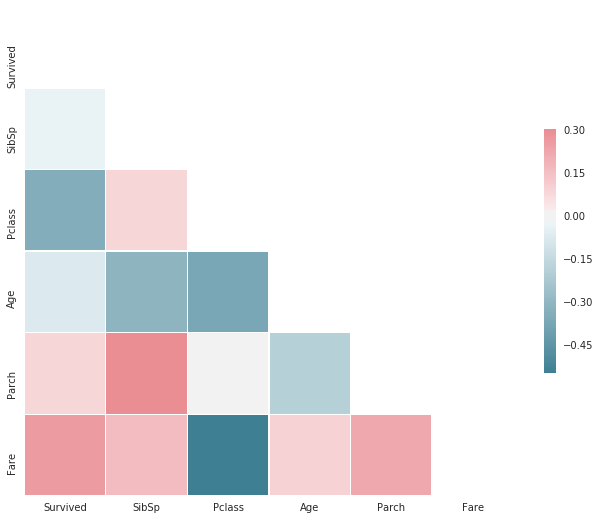

In [79]:
# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

## Export the dataset for later use

In [ ]:
## Export the dataset for later use
dd.to_csv('titanic_preprocessed.csv')